100%|██████████| 1000000/1000000 [00:36<00:00, 27515.30it/s]
/home/zaemoore/.local/lib/python3.10/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Sequential sampling (1 chains in 1 job)
BinaryMetropolis: [x]


Sampling 1 chain for 0 tune and 89_600 draw iterations (0 + 89_600 draws total) took 18 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
100%|██████████| 1000000/1000000 [00:38<00:00, 25885.59it/s]
/home/zaemoore/.local/lib/python3.10/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Sequential sampling (1 chains in 1 job)
BinaryMetropolis: [x]


Sampling 1 chain for 0 tune and 89_600 draw iterations (0 + 89_600 draws total) took 15 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
100%|██████████| 1000000/1000000 [00:37<00:00, 26426.08it/s]
Sequential sampling (1 chains in 1 job)
BinaryMetropolis: [x]


Sampling 1 chain for 0 tune and 89_600 draw iterations (0 + 89_600 draws total) took 15 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
100%|██████████| 1000000/1000000 [00:36<00:00, 27594.30it/s]
Sequential sampling (1 chains in 1 job)
BinaryMetropolis: [x]


Sampling 1 chain for 0 tune and 89_600 draw iterations (0 + 89_600 draws total) took 14 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
100%|██████████| 1000000/1000000 [00:36<00:00, 27313.66it/s]
Sequential sampling (1 chains in 1 job)
BinaryMetropolis: [x]


Sampling 1 chain for 0 tune and 89_600 draw iterations (0 + 89_600 draws total) took 14 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
100%|██████████| 1000000/1000000 [00:37<00:00, 26961.69it/s]
Sequential sampling (1 chains in 1 job)
BinaryMetropolis: [x]


Sampling 1 chain for 0 tune and 89_600 draw iterations (0 + 89_600 draws total) took 15 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
100%|██████████| 1000000/1000000 [00:38<00:00, 26228.73it/s]
Sequential sampling (1 chains in 1 job)
BinaryMetropolis: [x]


Sampling 1 chain for 0 tune and 89_600 draw iterations (0 + 89_600 draws total) took 14 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
100%|██████████| 1000000/1000000 [00:36<00:00, 27277.09it/s]
Sequential sampling (1 chains in 1 job)
BinaryMetropolis: [x]


Sampling 1 chain for 0 tune and 89_600 draw iterations (0 + 89_600 draws total) took 14 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
100%|██████████| 1000000/1000000 [00:35<00:00, 28261.76it/s]
Sequential sampling (1 chains in 1 job)
BinaryMetropolis: [x]


Sampling 1 chain for 0 tune and 89_600 draw iterations (0 + 89_600 draws total) took 14 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
100%|██████████| 1000000/1000000 [00:35<00:00, 27976.83it/s]
Sequential sampling (1 chains in 1 job)
BinaryMetropolis: [x]


Sampling 1 chain for 0 tune and 89_600 draw iterations (0 + 89_600 draws total) took 15 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
100%|██████████| 10/10 [08:47<00:00, 52.74s/it]
<ipython-input-1-1417af99e59f>:231: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(right=0.8)


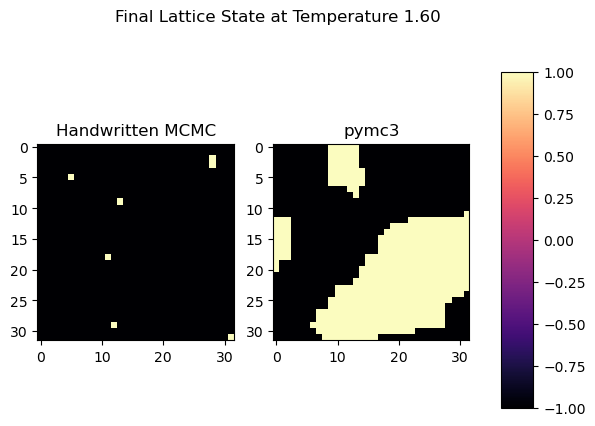

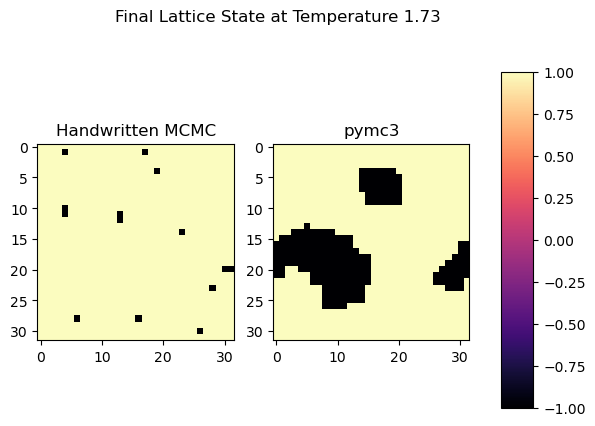

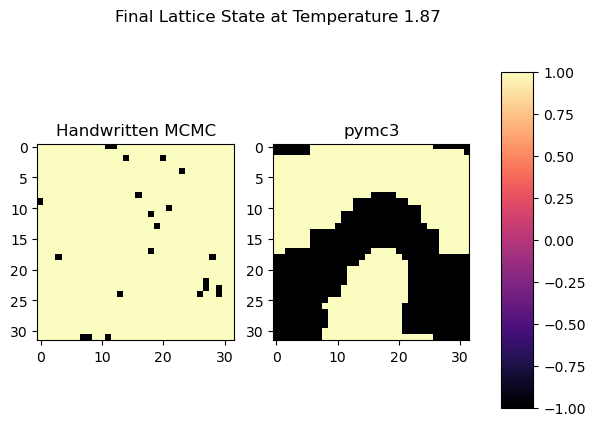

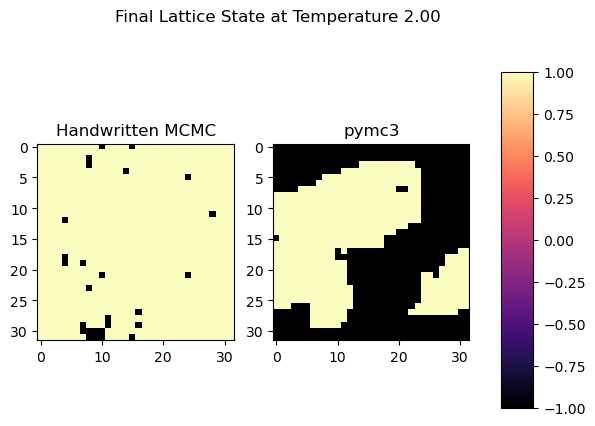

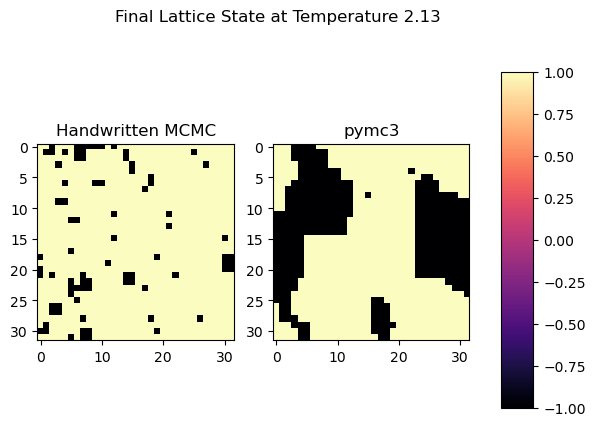

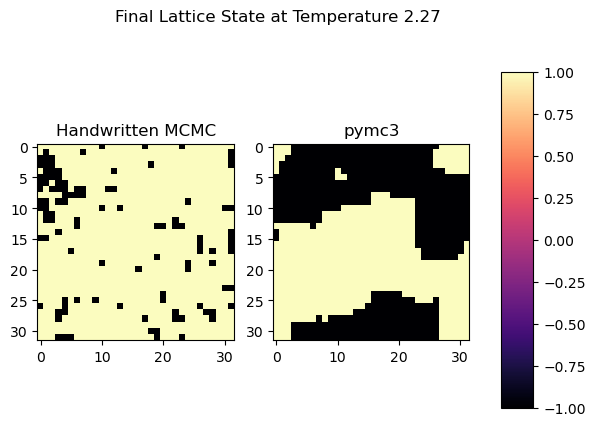

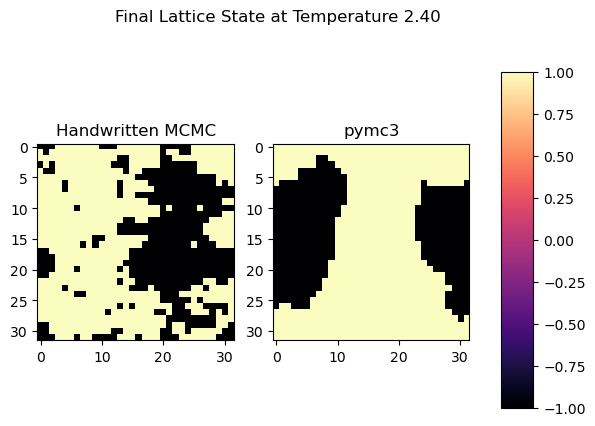

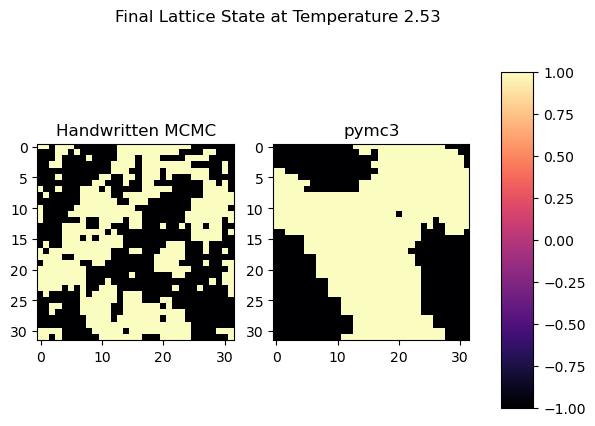

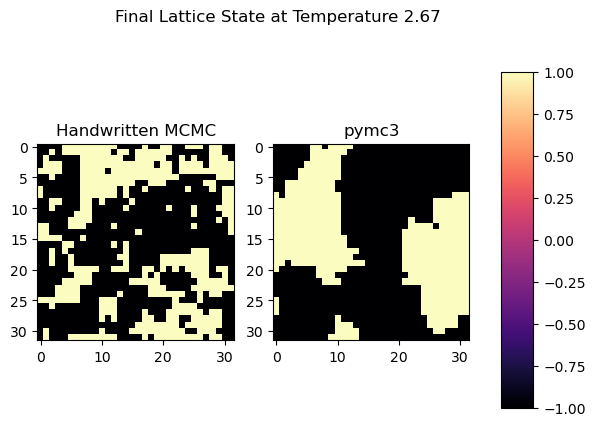

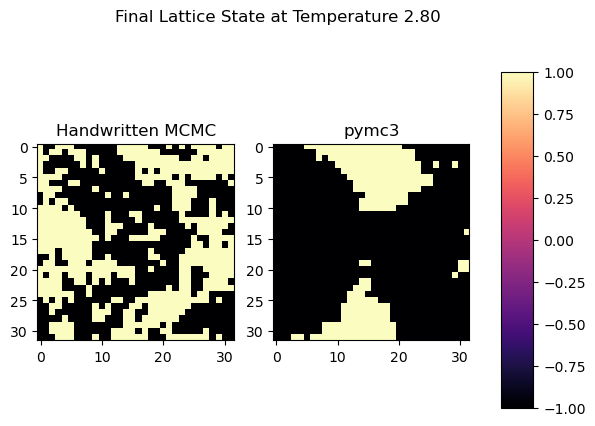

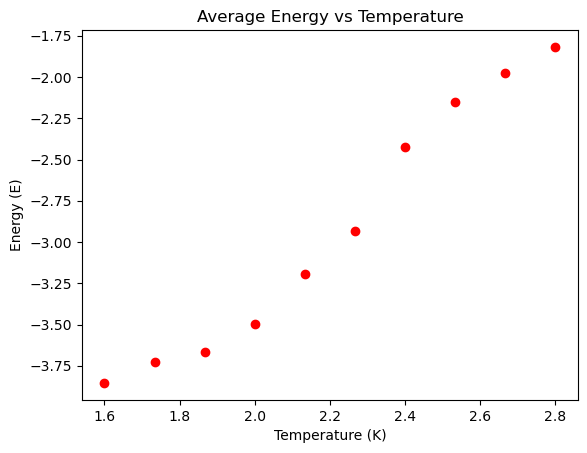

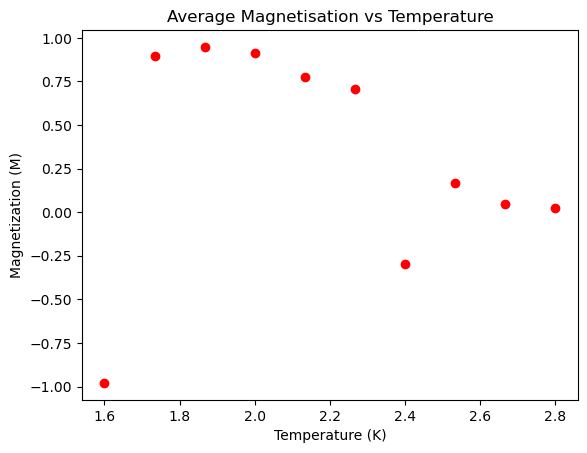

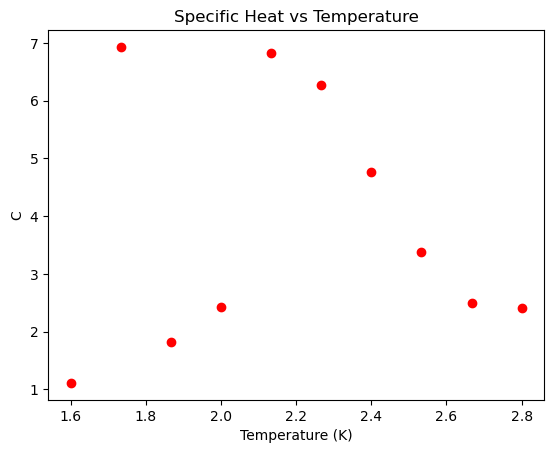

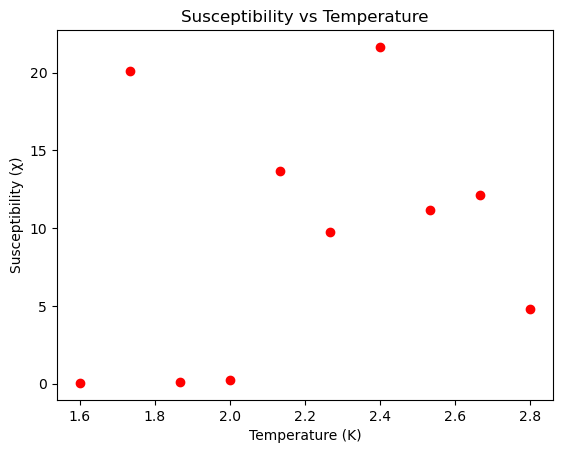

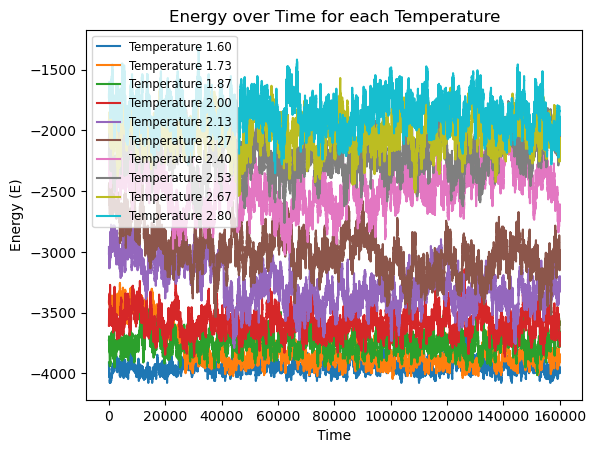

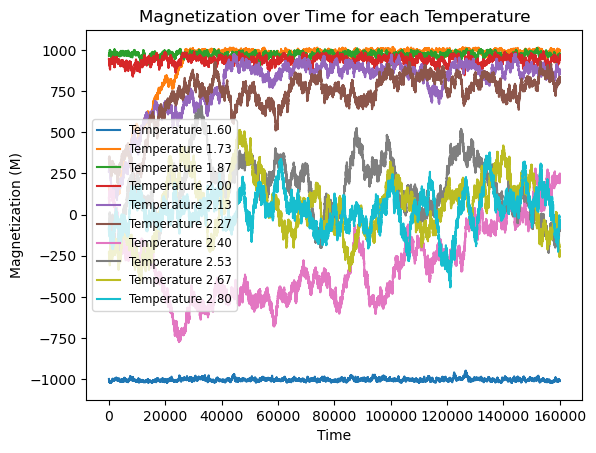

100%|██████████| 1000000/1000000 [00:35<00:00, 28113.85it/s]


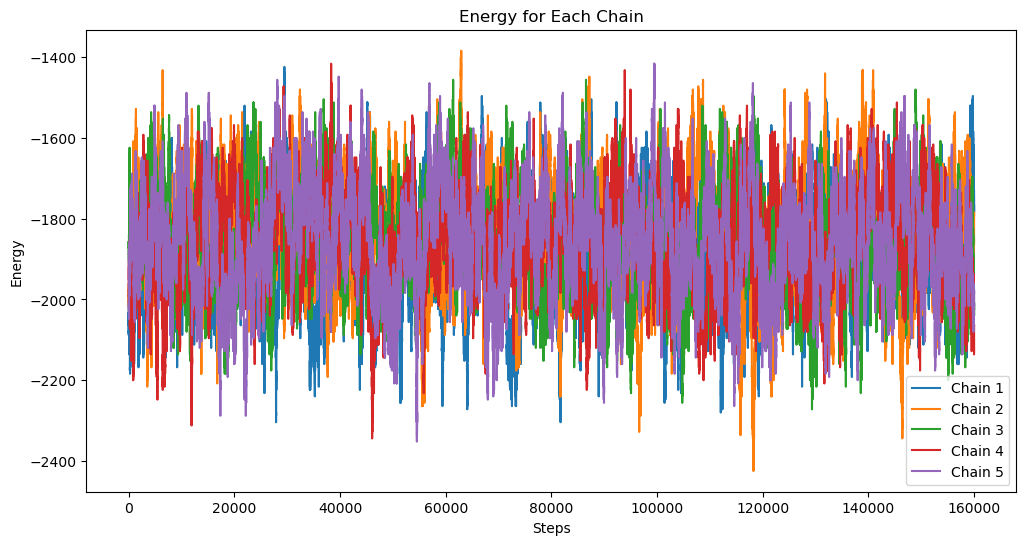

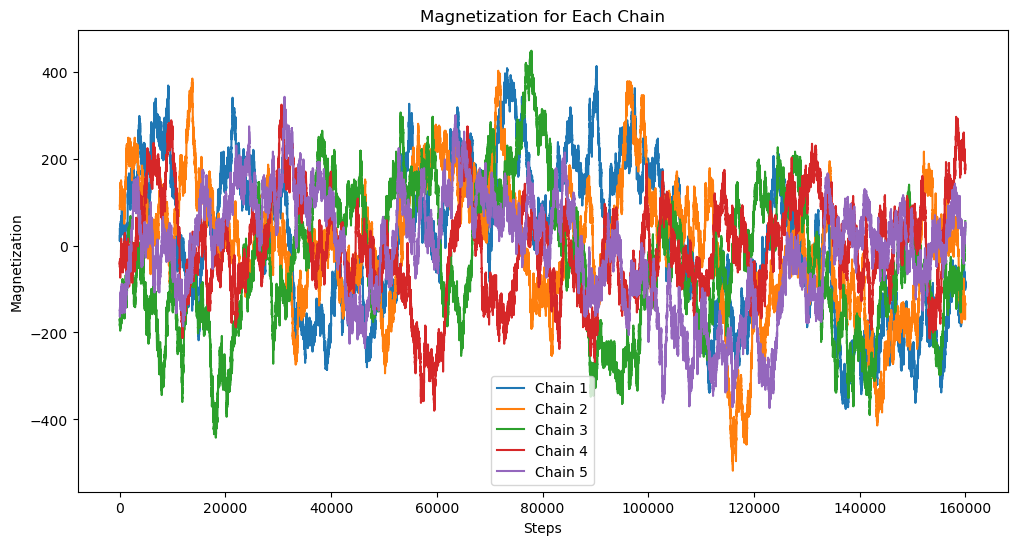

Gelman-Rubin Diagnostic for Magnetization: 1.0081186823636206
Gelman-Rubin Diagnostic for Energy: 1.0081559678021914
Simulation Complete


In [1]:
"""
Markov Chain Monte Carlo simulation of 2D Ising Model

"""
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import uniform
from tqdm import tqdm
import pymc3 as pm
import theano.tensor as tt

def data(N, initialization):
    """Generate initial random spin data in a lattice structure

    Parameters
    ----------
    N : int
        Size of the spin lattice will be NxN
    initialization : int
        Determines the starting state of the lattice

    Returns
    -------
    latticeSpins : 2D array of ints
        Lattice of spin states
    """
    if initialization == 1:
        return np.ones((N, N))
    elif initialization == -1:
        return -1 * np.ones((N, N))
    elif initialization == 0:
        return np.random.choice([-1, 1], size=(N, N))
    else:
        print("Invalid option. Assuming random initial states")
        return np.random.choice([-1, 1], size=(N, N))

def delta_energy(lattice, i, j, J, N):
    """Calculate the energy change for flipping a spin at (i, j). This is the likelihood function
    
    Parameters
    ----------
    lattice : 2D array of ints
        Lattice of spin states
    i : int
        Row of randomly chosen element in the lattice
    j : int
        Column of randomly chosen element in the lattice
    J : int
        Strength of interaction between neighbors
    
    Returns
    -------
    int
        Change in energy for flipping a randomly chosen spin state
    """
    spin = lattice[i, j]
    neighbors = lattice[(i-1)%N, j] + lattice[(i+1)%N, j] + lattice[i, (j-1)%N] + lattice[i, (j+1)%N]
    return 2 * J * spin * neighbors

def mcmc(lattice, beta, J, total_steps, N, measurement_gap):
    """Run the Markov Chain Monte Carlo simulation for a number of steps and record the results
    
    Parameters
    ----------
    lattice : 2D array of ints
        Lattice of spin states
    beta : float
        Value of beta = 1/KbT
    J : int
        Strength of interaction between neighbors
    total_steps : int
        Number of steps to be done in the mcmc
    N : int
        Size of the spin lattice is NxN
    measurement_gap : int
        Determines how often the mcmc measures physical properties of the system

    Returns
    -------
    lattice : 2D array of ints
        Updated lattice of spin states
    avg_magnetization : float
        Average magnetization of system
    avg_energy : float
        Average energy of system
    specific_heat_val : float
        Specific heat of system
    susceptibility : float
        Susceptibility of system

    """
    equilibration_steps = int(0.2 * total_steps)
    magnetizations = []
    energies = []

    for step in tqdm(range(total_steps)):
        i, j = np.random.randint(0, N, size=2)
        dE = delta_energy(lattice, i, j, J, N)
        if dE < 0 or np.random.rand() < np.exp(-beta * dE):
            lattice[i, j] *= -1
        if step >= equilibration_steps and step % measurement_gap == 0:
            energies.append(-J * np.sum(lattice * (np.roll(lattice, 1, axis=0) + np.roll(lattice, -1, axis=0) +
                                      np.roll(lattice, 1, axis=1) + np.roll(lattice, -1, axis=1))))
            magnetizations.append(np.sum(lattice))

    avg_energy = np.mean(energies)
    avg_magnetization = np.mean(magnetizations)
    specific_heat_val = (np.var(energies) / (N**2)) * (beta**2)
    susceptibility = (np.var(magnetizations) / (N**2)) * beta

    return lattice, avg_magnetization, avg_energy, specific_heat_val, susceptibility, energies, magnetizations

#pymc3
def get_Energy(spins):
    """Calculates the energy of the spin lattice at a particular state
    
    Parameters
    ----------
    spins : 2D array of ints
        Lattice of spin states

    Returns
    -------
    energy : int
        Energy of the state

    """
    energy = - (
        tt.roll(spins, 1, axis=1) * spins +
        tt.roll(spins, 1, axis=0) * spins +
        tt.roll(spins, -1, axis=1) * spins +
        tt.roll(spins, -1, axis=0) * spins
    )
    return energy

def to_spins(lattice):
    """Adapts the pymc3 spin lattice from 0s and 1s to -1s and +1s
    Pymc3 cannot efficiently make a lattice with negative values, so
    we have it create one of 1s and 0s and then manipulate it after
    
    Parameters
    ----------
    lattice : 2D array of ints
        Lattice of spin states in 0s and +1s

    Returns
    -------
    2D array of ints
        Lattice of spin states in +1s and -1s

    """
    return 2 * lattice - 1

def mc3_approach(beta, N, num_steps=10):
    """Pymc3 approach
    I wrote this while being repeatedly stabbed by tiny ink filled needles
    
    Parameters
    ----------
    beta : float
        Value of beta = 1/KbT
    num_steps : int
        Number of steps to be done in the mcmc
    N : int
        Size of the spin lattice is NxN

    Returns
    -------
    lattice : 2D array of ints
        Updated lattice of spin states
    trace : MultiTrace
        Spin lattice at every step

    """
    shape = (N, N)
    x0 = np.random.randint(2, size=shape)
    with pm.Model() as model:
        x = pm.Bernoulli('x', 0.5, shape=shape, testval=x0)
        magnetization = pm.Potential('m', -get_Energy(to_spins(x)) * beta)
        scaling = .0006
        mul = int(N * N * 1.75)
        step = pm.BinaryMetropolis([x], scaling=scaling)
        trace = pm.sample(num_steps * mul * 5, step=step, chains=1, tune=False)
    lattice = 2 * trace[-1]['x'] - 1
    return lattice, trace

# Parameters
N = 32  # Increased lattice size for better resolution
num_steps = 1000000  # Increased total number of steps for better averaging
measurement_gap = 5  # Measurement gap introduced
J = 1 # Interaction parameter
kB = 1  # Boltzmann constant
temperature_values = np.linspace(1.6, 2.8, 10)  # Adjusted temperature range
beta_values = 1 / (kB * temperature_values)

# Data containers
magnetizations = []
avg_energies = []
specific_heats = []
susceptibilities = []
energy_plot = []
mag_plot = []
lattice_list = []
mc3_lattice_list = []

initialization = int(input("Initializing spin lattice state. Please choose initial state. \n Type '1' for all spins to be set to +1. \n Type '-1' for all spins to be set to -1. \n Type '0' for spins to be random. \n Initial state input: "))

#Testing different temperatures to find the phase transition
for beta in tqdm(beta_values):
    lattice = data(N, initialization)
    lattice, avg_mag, avg_energy, spec_heat, susceptibility, energy_list, mag_list = mcmc(lattice, beta, J, num_steps, N, measurement_gap)
    magnetizations.append(avg_mag / (N**2))
    avg_energies.append(avg_energy / (N**2))
    specific_heats.append(spec_heat)
    susceptibilities.append(susceptibility)
    energy_plot.append(energy_list)
    mag_plot.append(mag_list)
    lattice_list.append(lattice)
    mc3_lattice, trace = mc3_approach(beta, N)
    mc3_lattice_list.append(mc3_lattice)


# Visualization of the Final Spin Lattice
for i in range(len(beta_values)):
    fig, axes = plt.subplots(nrows=1, ncols=2, constrained_layout=True)
    im = axes[0].imshow(lattice_list[i], cmap="magma")
    axes[0].set_title('Handwritten MCMC')
    im = axes[1].imshow(mc3_lattice_list[i], cmap="magma")
    axes[1].set_title('pymc3')

    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
    fig.colorbar(im, cax=cbar_ax)
    fig.suptitle("Final Lattice State at Temperature %.2f"%temperature_values[i])
    plt.show()


# Visualization of Energy vs Temperature (scatter plot)
plt.figure()
plt.scatter(temperature_values, avg_energies, color='red')
plt.title("Average Energy vs Temperature")
plt.xlabel("Temperature (K)")
plt.ylabel("Energy (E)")
plt.show()

# Visualization of Magnetization vs Temperature (scatter plot)
plt.figure()
plt.scatter(temperature_values, magnetizations, color='red')
plt.title("Average Magnetisation vs Temperature")
plt.xlabel("Temperature (K)")
plt.ylabel("Magnetization (M)")
plt.show()

# Visualization of Specific Heat vs Temperature (scatter plot)
plt.figure()
plt.scatter(temperature_values, specific_heats, color='red')
plt.title("Specific Heat vs Temperature")
plt.xlabel("Temperature (K)")
plt.ylabel("C")
plt.show()

# Visualization of Susceptibility vs Temperature (scatter plot)
plt.figure()
plt.scatter(temperature_values, susceptibilities, color='red')
plt.title("Susceptibility vs Temperature")
plt.xlabel("Temperature (K)")
plt.ylabel("Susceptibility (χ)")
plt.show()

# Visualization of Energy over time for each Temp value
plt.figure()
for i in range(len(energy_plot)):
    plt.plot(energy_plot[i], label = "Temperature %.2f"%temperature_values[i])
plt.legend(loc='upper left', fontsize='small')
plt.title("Energy over Time for each Temperature")
plt.xlabel("Time")
plt.ylabel("Energy (E)")
plt.show()

# Visualization of Magnetization over time for each Temp value
plt.figure()
for i in range(len(mag_plot)):
    plt.plot(mag_plot[i], label = "Temperature %.2f"%temperature_values[i])
plt.legend(loc='center left', fontsize='small')
plt.title("Magnetization over Time for each Temperature")
plt.xlabel("Time")
plt.ylabel("Magnetization (M)")
plt.show()

# Parameters for multiple chain analysis
num_chains = 5  # the number of independent chains
energies_all_chains = []
magnetizations_all_chains = []

# Running multiple independent chains and storing only energy and magnetization data
for chain in range(num_chains):
    lattice = data(N, initialization)  # Initializing each chain with a different lattice
    _, _, _, _, _, energies, magnetizations = mcmc(
        lattice, beta, J, num_steps, N, measurement_gap)
    energies_all_chains.append(energies)
    magnetizations_all_chains.append(magnetizations)

# Gelman-Rubin Diagnostic Function
def gelman_rubin(data):
    """Gelman-Rubin Diagnostic Function
    
    Parameters
    ----------
    data : Array of floats
        Array of either energy or magnetization data for every chain

    Returns
    -------
    R_hat : float

    """
    n = len(data[0])  # Number of samples per chain
    m = len(data)     # Number of chains
	# Mean of each chain and overall mean
    chain_means = np.mean(data, axis=1)
    overall_mean = np.mean(chain_means)
    # Between-chain variance and Within-chain variance
    B_over_n = np.sum((chain_means - overall_mean)**2) / (m - 1)
    W = np.sum([np.var(chain, ddof=1) for chain in data]) / m
    # Variance estimate
    var_plus = ((n - 1) / n) * W + B_over_n
    # Potential scale reduction factor
    R_hat = np.sqrt(var_plus / W)
    return R_hat

# Apply Gelman-Rubin Diagnostic for Magnetization and Energy
R_hat_magnetization = gelman_rubin(magnetizations_all_chains)
R_hat_energy = gelman_rubin(energies_all_chains)

# Plotting the energy for each chain
plt.figure(figsize=(12, 6))
for i, energy_chain in enumerate(energies_all_chains):
    plt.plot(energy_chain, label=f'Chain {i+1}')
plt.xlabel('Steps')
plt.ylabel('Energy')
plt.title('Energy for Each Chain')
plt.legend()
plt.show()

# Plotting the magnetization for each chain
plt.figure(figsize=(12, 6))
for i, magnetization_chain in enumerate(magnetizations_all_chains):
    plt.plot(magnetization_chain, label=f'Chain {i+1}')
plt.xlabel('Steps')
plt.ylabel('Magnetization')
plt.title('Magnetization for Each Chain')
plt.legend()
plt.show()

print("Gelman-Rubin Diagnostic for Magnetization:", R_hat_magnetization)
print("Gelman-Rubin Diagnostic for Energy:", R_hat_energy)
print("Simulation Complete")